# Assignment 2

## Data

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The data was taken from Kaggle. The `athlete_events` Dataset contains $271,116$ rows and $15$ columns.

**Source:**

Griffin, R, H (2018) 120 years of Olympic history: athletes and results, athlete_events, Found at: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv

**ATTRIBUTES:**

**athlete_events.csv**

| Column Name | Data Type | Description/Notes |
|:----:|:----:|:----|
| ID |  integer | Unique number for each athlete |
| Name | string | Athlete’s name |
| Sex | string | M or F |
| Age | integer |  |
| Height | integer | In centimeters |
| Weight | integer | In kilograms |
| Team | string | Team name |
| NOC | string | National Olympic Committee, 3 letter code (Matches with `NOC` from noc_regions.csv) |
| Games | string | Year and season |
| Year | integer |  |
| Season | string | Summer or Winter |
| City | string | Host city |
| Sport | string |  |
| Event | string |  |
| Medal | string | Gold, Silver, Bronze, or NA |

Download athlete_events.csv from the link above and load it into a DataFrame called `athlete_events`:

In [ ]:
# Your answer goes here
import pandas as pd

url = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/athlete_events.csv'
athlete_events = pd.read_csv(url)

Use `info()` method on this DataFrame to get a sense of the data:

In [ ]:
# Your answer goes here
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Question 1
Clearly not every athlete receives a medal in the olympics. How many records have a non-null value for `Medal` field? In other words, how many medals were given according to this dataset?

In [ ]:
# Your answer goes here
athlete_events[athlete_events['Medal'].notnull()].count()

ID        39783
Name      39783
Sex       39783
Age       39051
Height    31072
Weight    30456
Team      39783
NOC       39783
Games     39783
Year      39783
Season    39783
City      39783
Sport     39783
Event     39783
Medal     39783
dtype: int64

Use the `head()` method to inspect the first few rows of the data:

In [ ]:
# Your answer goes here
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Question 2 & 3

What is the earliest and latest Olympic that is captured in this dataset?

In [ ]:
# Your answer goes here
earliest = athlete_events['Year'].min()
print(earliest)

1896


In [ ]:
# Your answer goes here
latest = athlete_events['Year'].max()
print(latest)

2016


## Question 4 & 5

Is the following statement True or False?

> Average age of female athletes who attended the Olympic games after 1990 has risen compared to the era before then.

In [ ]:
# Your answer goes here

# find athletes before 1990

b_1990 = athlete_events['Year'] < 1990

# find female athletes before 1990
is_female = athlete_events['Sex'] == 'F'

# average age of female athletes before 1990
female_b1990 = athlete_events[b_1990][is_female]['Age'].mean()

# average age of female athletes after 1990
female_a1990 = athlete_events[~b_1990][is_female]['Age'].mean()

print(female_b1990)
print(female_a1990)

# check average age of female athletes who attended the Olympic games after 1990 is greater than before 1990

print(female_a1990> female_b1990)

22.0290214609175
24.62131696199413
True


<ipython-input-7-c4a3445e677b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_b1990 = athlete_events[b_1990][is_female]['Age'].mean()
<ipython-input-7-c4a3445e677b>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_a1990 = athlete_events[~b_1990][is_female]['Age'].mean()


In [ ]:
# Your answer goes here


## Question 6 & 7

How many Gold medals were given to men from 1970 to 2000 (including both years)?

In [ ]:
# Your answer goes here

# find the year of athlete events >= 1970 
constraint_year1 = athlete_events['Year'] >= 1970

# find the year of athlete events <=
constraint_year2 = athlete_events['Year'] <= 2000

# find Medal is Gold
constraint_medal = athlete_events['Medal'] == 'Gold'

# find athlete is Male
constraint_sex = athlete_events['Sex'] == "M"

# find Gold medals were given to men from 1970 to 2000 
gold_M_1970_2000 = athlete_events[constraint_year1 & constraint_year2 & constraint_medal & constraint_sex]

# find how many gold medals were given to men from 1970 t0 2000
print(gold_M_1970_2000.shape[0])



3207


## Question 8 & 9

How many athletes attended the Olympic games in 1968?

Hint: You can use the method `.unique()` on any pandas Series to get the unique values. Any column subset of a DataFrame returns a Series object.

In [ ]:
# Your answer goes here

athletes1968 = athlete_events[athlete_events['Year'] == 1968]

# find athletes who attended events in 1968, and the name of athletes is not replicated

unique_athlete = athletes1968['ID'].unique()



print(unique_athlete.shape[0])


6717


## Question 10 & 11

Who won the event "Swimming Men's 100 metres Breaststroke" in 2004? Note that "metres" has a British spelling!

In [ ]:
# Your answer goes here


In [ ]:
# find who won the event "Swimming Men's 100 metres Breaststroke" in 2004
win = athlete_events[(athlete_events['Year'] == 2004) & (athlete_events['Medal'] == 'Gold') & (athlete_events['Event'] == "Swimming Men's 100 metres Breaststroke")]
print(win)

           ID             Name Sex   Age  Height  Weight   Team  NOC  \
120309  60893  Kosuke Kitajima   M  21.0   178.0    73.0  Japan  JPN   

              Games  Year  Season    City     Sport  \
120309  2004 Summer  2004  Summer  Athina  Swimming   

                                         Event Medal  
120309  Swimming Men's 100 metres Breaststroke  Gold  


## Question 12 & 13
In the Year 2004, which National Olympic Committee (NOC) had the fourth-highest medal tally?

In [ ]:
# select events in 2004
events_year_2004 = athlete_events[athlete_events['Year'] == 2004]

# medals in 2004
medals_2004 = events_year_2004[events_year_2004['Medal'].notnull()]

# count how many did each NOC win medals in 2004
noc_num_medals_2004 = medals_2004.groupby('NOC')['Medal'].count()


# sorted by "Medal"
noc_num_medals_2004_sorted = noc_num_medals_2004.sort_values(ascending=False)

print(noc_num_medals_2004_sorted)


NOC
USA    263
RUS    189
AUS    157
GER    149
ITA    104
      ... 
TTO      1
ERI      1
DOM      1
MGL      1
SYR      1
Name: Medal, Length: 74, dtype: int64


## Question 14 & 15
What was the average age of male athletes for the year with the third-highest male participation of all years? And what year was that?

(Assume that if an athlete competes in 2 or more events in a given year, that counts as 2 or more participations.)

In [ ]:
# Your answer goes here

# find male athletes
is_male = athlete_events[athlete_events['Sex'] == "M"]

# find the sum of male athletes each year 
num_male_year = is_male.groupby('Year').count()

# sorted data base on number of male athletes
num_male_year_sorted = num_male_year.sort_values(by = 'Sex', ascending= False)

# find the third highest year of male athletes
third_highest_row = num_male_year_sorted.iloc[2]

# find the name of the third highest year of male athletes
third_highest_year = third_highest_row.name

male_in_third_year = is_male[is_male['Year'] == third_highest_year]

# find the average age of male athletes in the third year 
avg_male_age_in_third_year = male_in_third_year['Age'].mean()

print('The third highest year is:', third_highest_year)
print('The average age is:', avg_male_age_in_third_year)








The third highest year is: 1972
The average age is: 25.31050869424344


## Question 16 (bonus)

Using the `athlete_events` dataframe and **seaborn** and/or **Matplotlib** library, create one plot to describe a portion of the dataset. This question is left open intentionally. To get the full points, make sure to customize your plot and produce a meaningful graph that follows best practices. For instance, it should have a title, and axes labels; it should be readable and insightful for an audience that is not familiar with the dataset.

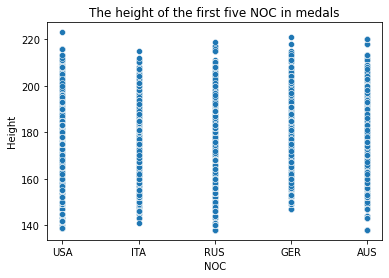

In [ ]:
# Your answer goes here

import seaborn as sns
import matplotlib.pyplot as plt


countries_of_interest = ['USA', 'RUS', 'AUS', 'GER', 'ITA']
subset_data = athlete_events[athlete_events['NOC'].isin(countries_of_interest)]

sns.scatterplot(x='NOC', y='Height', data=subset_data)

plt.title("The height of the first five NOC in medals")
plt.xlabel("NOC")
plt.ylabel("Height")

plt.show()

